In [1]:
# Assignment: DSC550 Week10 
# Name: Bezawada, Sashidhar
# Date: 2023-05-20
# 8.2 Term Project: Term Project Milestone 3: Model Building and Evaluation

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load the dataset as a Pandas data frame
df_brainstroke= pd.read_csv("datasets/week6/brain_stroke.csv")

In [4]:
#Display the first ten rows of data
df_brainstroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
#Find the information in the data frame.
df_brainstroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df_brainstroke['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [7]:
df_brainstroke['hypertension'].unique()

array([0, 1], dtype=int64)

In [8]:
df_brainstroke['heart_disease'].unique()

array([1, 0], dtype=int64)

In [9]:
df_brainstroke['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df_brainstroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
df_brainstroke['stroke'].unique()

array([1, 0], dtype=int64)

## MILESTONE 2

## Data Transformation

### 1. Dropping Columns/Features

Dropping column Id as this a unique number given to each record (can be patient id or random generated number or serial number). It has no significance in decision making.

In [12]:
df_brainstroke = df_brainstroke.drop('id',axis=1)

### 2. Replacing values in a cloumn

Changing work type 'Children' as 'Student' as Children is not work type and Changing formatting for other work types. Changing binary values to string values of Yes and No instead of 1 and 0 respectively for hypertension and heart_disease.

In [13]:
#Changing work type 'Children' as 'Student' as Children is not work type and Changing formatting for other work types

df_brainstroke['work_type'] = df_brainstroke['work_type'].replace(['children'], 'Student')
df_brainstroke['work_type'] = df_brainstroke['work_type'].replace(['Self-employed'], 'Self Employed')
df_brainstroke['work_type'] = df_brainstroke['work_type'].replace(['Govt_job'], 'Government')

In [14]:
df_brainstroke['work_type'].unique()

array(['Private', 'Self Employed', 'Government', 'Student',
       'Never_worked'], dtype=object)

In [15]:
#Changing binary values to string values of Yes and No instead of 1 and 0 respectively for  hypertension and heart_disease
df_brainstroke['hypertension'] = df_brainstroke['hypertension'].replace([1], 'Yes')
df_brainstroke['hypertension'] = df_brainstroke['hypertension'].replace([0], 'No')

df_brainstroke['heart_disease'] = df_brainstroke['heart_disease'].replace([1], 'Yes')
df_brainstroke['heart_disease'] = df_brainstroke['heart_disease'].replace([0], 'No')


In [16]:
df_brainstroke['hypertension'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df_brainstroke['heart_disease'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df_brainstroke['stroke'].unique()

array([1, 0], dtype=int64)

In [19]:
df_brainstroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### 3. Renaming Column Name
Changing column name stroke to brain_stroke as this is more meaningful

In [20]:
df_brainstroke = df_brainstroke.rename(columns={'stroke': 'brain_stroke'})

In [21]:
df_brainstroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,brain_stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,No,No,Yes,Self Employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,Yes,No,Yes,Self Employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,No,No,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.2,Unknown,1


In [22]:
df_brainstroke.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
brain_stroke           int64
dtype: object

### 4. Transform features

As per BMI chart on National Heart, Lung and Blood Institute website (https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl2.html), the maximum BMI is 54. So, any value above 54 is unrelaistic. 
So, replace values over 54 with 54 considering the person is obese.

In [23]:
np.max(df_brainstroke['bmi'])

97.6

In [24]:
max_bmi = 54.0
df_brainstroke['bmi'][df_brainstroke['bmi']>max_bmi] = max_bmi

C:\Users\sashi_000\AppData\Local\Temp\ipykernel_15068\849835967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brainstroke['bmi'][df_brainstroke['bmi']>max_bmi] = max_bmi


In [25]:
np.max(df_brainstroke['bmi'])

54.0

### 5. Engineer new useful features.

Adding new column stage_of_life based on the age as we can decide which age group has an impact

In [26]:
df_brainstroke['stage_of_life'] = np.where(df_brainstroke.age <= 2, 'Infant', 
                                 np.where(df_brainstroke.age < 5, 'Toddler', 
                                 np.where(df_brainstroke.age < 13, 'Child',
                                 np.where(df_brainstroke.age < 20, 'Teen',
                                 np.where(df_brainstroke.age < 40, 'Adult',
                                 np.where(df_brainstroke.age < 60, 'Middle Age Adult ','Senior Adult'))))))

In [27]:
df_brainstroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,brain_stroke,stage_of_life
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior Adult
1,Female,61.0,No,No,Yes,Self Employed,Rural,202.21,NaN,never smoked,1,Senior Adult
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior Adult
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Age Adult
4,Female,79.0,Yes,No,Yes,Self Employed,Rural,174.12,24.0,never smoked,1,Senior Adult
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Senior Adult
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,1,Senior Adult
7,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,1,Senior Adult
8,Female,59.0,No,No,Yes,Private,Rural,76.15,NaN,Unknown,1,Middle Age Adult
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.2,Unknown,1,Senior Adult


I am adding one more column 'weight_status' as bmi might have different values and difficult guage details on that. So, weight_status will categorize them into 3 different categories.Instead of bmi, I feel weight_status will be best suited for analysis.

In [28]:
df_brainstroke['weight_status'] = np.where(df_brainstroke.bmi < 18.5, 'Underweight', 
                                 np.where(df_brainstroke.bmi < 25.0, 'Healthy weight', 
                                 np.where(df_brainstroke.bmi < 30, 'Overweight','Obesity')))

In [29]:
df_brainstroke.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,brain_stroke,stage_of_life,weight_status
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior Adult,Obesity
1,Female,61.0,No,No,Yes,Self Employed,Rural,202.21,NaN,never smoked,1,Senior Adult,Obesity
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior Adult,Obesity
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Age Adult,Obesity
4,Female,79.0,Yes,No,Yes,Self Employed,Rural,174.12,24.0,never smoked,1,Senior Adult,Healthy weight
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Senior Adult,Overweight
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,1,Senior Adult,Overweight
7,Female,69.0,No,No,No,Private,Urban,94.39,22.8,never smoked,1,Senior Adult,Healthy weight
8,Female,59.0,No,No,Yes,Private,Rural,76.15,NaN,Unknown,1,Middle Age Adult,Obesity
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.2,Unknown,1,Senior Adult,Healthy weight


### 6. Replace Null Values

In [30]:
df_brainstroke.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
brain_stroke           0
stage_of_life          0
weight_status          0
dtype: int64

As there are 201 null values for bmi, if we remove them, it will reduce dataset drastically. So, I am replacing null values with median.

In [31]:
df_brainstroke['bmi'] = df_brainstroke['bmi'].fillna(df_brainstroke['bmi'].median())

In [32]:
df_brainstroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
brain_stroke         0
stage_of_life        0
weight_status        0
dtype: int64

### 7. String Values case change

Finally, changing string values to UPPER CASE to avoid same values due to different cases falling into 2 different categories

In [33]:
df_brainstroke = df_brainstroke.apply(lambda x: x.astype(str).str.upper())

In [34]:
np.sort(df_brainstroke['bmi'].unique())

array(['10.3', '11.3', '11.5', '12.0', '12.3', '12.8', '13.0', '13.2',
       '13.3', '13.4', '13.5', '13.7', '13.8', '13.9', '14.0', '14.1',
       '14.2', '14.3', '14.4', '14.5', '14.6', '14.8', '14.9', '15.0',
       '15.1', '15.2', '15.3', '15.4', '15.5', '15.6', '15.7', '15.8',
       '15.9', '16.0', '16.1', '16.2', '16.3', '16.4', '16.5', '16.6',
       '16.7', '16.8', '16.9', '17.0', '17.1', '17.2', '17.3', '17.4',
       '17.5', '17.6', '17.7', '17.8', '17.9', '18.0', '18.1', '18.2',
       '18.3', '18.4', '18.5', '18.6', '18.7', '18.8', '18.9', '19.0',
       '19.1', '19.2', '19.3', '19.4', '19.5', '19.6', '19.7', '19.8',
       '19.9', '20.0', '20.1', '20.2', '20.3', '20.4', '20.5', '20.6',
       '20.7', '20.8', '20.9', '21.0', '21.1', '21.2', '21.3', '21.4',
       '21.5', '21.6', '21.7', '21.8', '21.9', '22.0', '22.1', '22.2',
       '22.3', '22.4', '22.5', '22.6', '22.7', '22.8', '22.9', '23.0',
       '23.1', '23.2', '23.3', '23.4', '23.5', '23.6', '23.7', '23.8',
      

### Final dataset after Data preparation:

In [35]:
df_brainstroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,brain_stroke,stage_of_life,weight_status
0,MALE,67.0,NO,YES,YES,PRIVATE,URBAN,228.69,36.6,FORMERLY SMOKED,1,SENIOR ADULT,OBESITY
1,FEMALE,61.0,NO,NO,YES,SELF EMPLOYED,RURAL,202.21,28.1,NEVER SMOKED,1,SENIOR ADULT,OBESITY
2,MALE,80.0,NO,YES,YES,PRIVATE,RURAL,105.92,32.5,NEVER SMOKED,1,SENIOR ADULT,OBESITY
3,FEMALE,49.0,NO,NO,YES,PRIVATE,URBAN,171.23,34.4,SMOKES,1,MIDDLE AGE ADULT,OBESITY
4,FEMALE,79.0,YES,NO,YES,SELF EMPLOYED,RURAL,174.12,24.0,NEVER SMOKED,1,SENIOR ADULT,HEALTHY WEIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,FEMALE,80.0,YES,NO,YES,PRIVATE,URBAN,83.75,28.1,NEVER SMOKED,0,SENIOR ADULT,OBESITY
5106,FEMALE,81.0,NO,NO,YES,SELF EMPLOYED,URBAN,125.2,40.0,NEVER SMOKED,0,SENIOR ADULT,OBESITY
5107,FEMALE,35.0,NO,NO,YES,SELF EMPLOYED,RURAL,82.99,30.6,NEVER SMOKED,0,ADULT,OBESITY
5108,MALE,51.0,NO,NO,YES,PRIVATE,RURAL,166.29,25.6,FORMERLY SMOKED,0,MIDDLE AGE ADULT,OVERWEIGHT


In [36]:
df_brainstroke = df_brainstroke.astype({'age': 'float', 'avg_glucose_level': 'float', 'bmi': 'float'})

In [37]:
df_brainstroke.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
brain_stroke          object
stage_of_life         object
weight_status         object
dtype: object

In [38]:
df_brainstroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,brain_stroke,stage_of_life,weight_status
0,MALE,67.0,NO,YES,YES,PRIVATE,URBAN,228.69,36.6,FORMERLY SMOKED,1,SENIOR ADULT,OBESITY
1,FEMALE,61.0,NO,NO,YES,SELF EMPLOYED,RURAL,202.21,28.1,NEVER SMOKED,1,SENIOR ADULT,OBESITY
2,MALE,80.0,NO,YES,YES,PRIVATE,RURAL,105.92,32.5,NEVER SMOKED,1,SENIOR ADULT,OBESITY
3,FEMALE,49.0,NO,NO,YES,PRIVATE,URBAN,171.23,34.4,SMOKES,1,MIDDLE AGE ADULT,OBESITY
4,FEMALE,79.0,YES,NO,YES,SELF EMPLOYED,RURAL,174.12,24.0,NEVER SMOKED,1,SENIOR ADULT,HEALTHY WEIGHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,FEMALE,80.0,YES,NO,YES,PRIVATE,URBAN,83.75,28.1,NEVER SMOKED,0,SENIOR ADULT,OBESITY
5106,FEMALE,81.0,NO,NO,YES,SELF EMPLOYED,URBAN,125.20,40.0,NEVER SMOKED,0,SENIOR ADULT,OBESITY
5107,FEMALE,35.0,NO,NO,YES,SELF EMPLOYED,RURAL,82.99,30.6,NEVER SMOKED,0,ADULT,OBESITY
5108,MALE,51.0,NO,NO,YES,PRIVATE,RURAL,166.29,25.6,FORMERLY SMOKED,0,MIDDLE AGE ADULT,OVERWEIGHT


In [39]:
df_brain_one_hot = pd.get_dummies(data=df_brainstroke,columns=['gender','hypertension','heart_disease','ever_married',
                                                         'work_type','Residence_type','smoking_status','stage_of_life',
                                                         'weight_status'])

In [40]:
df_brain_one_hot

,age,avg_glucose_level,bmi,brain_stroke,gender_FEMALE,gender_MALE,gender_OTHER,hypertension_NO,hypertension_YES,heart_disease_NO,...,stage_of_life_CHILD,stage_of_life_INFANT,stage_of_life_MIDDLE AGE ADULT,stage_of_life_SENIOR ADULT,stage_of_life_TEEN,stage_of_life_TODDLER,weight_status_HEALTHY WEIGHT,weight_status_OBESITY,weight_status_OVERWEIGHT,weight_status_UNDERWEIGHT
0,67.0,228.69,36.6,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,61.0,202.21,28.1,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,49.0,171.23,34.4,1,1,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,79.0,174.12,24.0,1,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,83.75,28.1,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
5106,81.0,125.20,40.0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
5107,35.0,82.99,30.6,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
5108,51.0,166.29,25.6,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [41]:
df_brain_one_hot.dtypes

age                                float64
avg_glucose_level                  float64
bmi                                float64
brain_stroke                        object
gender_FEMALE                        uint8
gender_MALE                          uint8
gender_OTHER                         uint8
hypertension_NO                      uint8
hypertension_YES                     uint8
heart_disease_NO                     uint8
heart_disease_YES                    uint8
ever_married_NO                      uint8
ever_married_YES                     uint8
work_type_GOVERNMENT                 uint8
work_type_NEVER_WORKED               uint8
work_type_PRIVATE                    uint8
work_type_SELF EMPLOYED              uint8
work_type_STUDENT                    uint8
Residence_type_RURAL                 uint8
Residence_type_URBAN                 uint8
smoking_status_FORMERLY SMOKED       uint8
smoking_status_NEVER SMOKED          uint8
smoking_status_SMOKES                uint8
smoking_sta

## Data Visualization

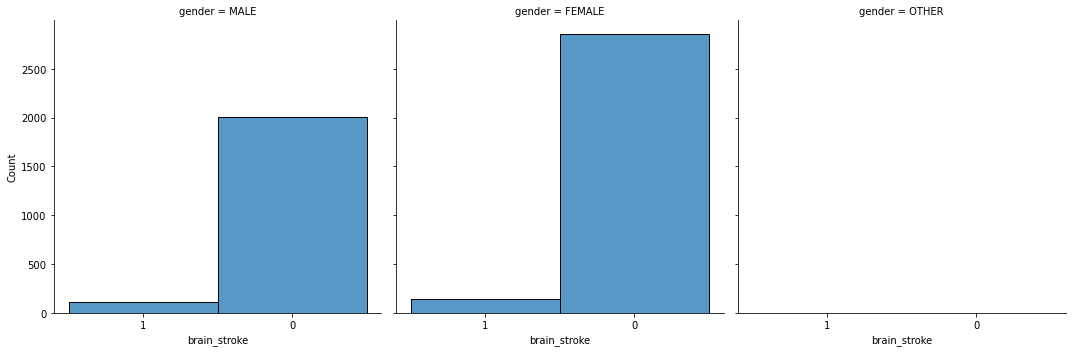

In [42]:
'''plt.figure()
plt.hist(df.loc[df_brainstroke['brain_stroke']=='Yes','gender'],align='mid')
plt.xlabel('Gender')
plt.ylabel('Count of Brain Strokes')
plt.title('Comparing Brain Stroke in patients based on the gender category')
plt.show()'''
import seaborn as sns
sns.displot(df_brainstroke, x="brain_stroke", col="gender")

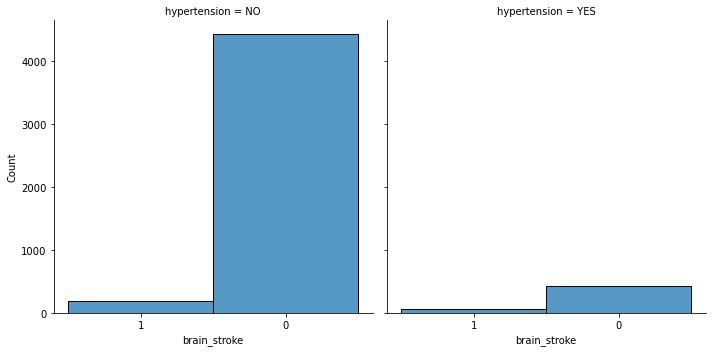

In [43]:
'''plt.figure()
plt.hist(df.loc[df_brainstroke['brain_stroke']=='Yes','hypertension'],align='mid')
plt.xlabel('Hypertension')
plt.ylabel('Count of Brain Strokes')
plt.title('1.	Comparing Brain Stroke in patients based on hypertension')
plt.show()'''
import seaborn as sns
sns.displot(df_brainstroke, x="brain_stroke", col="hypertension")

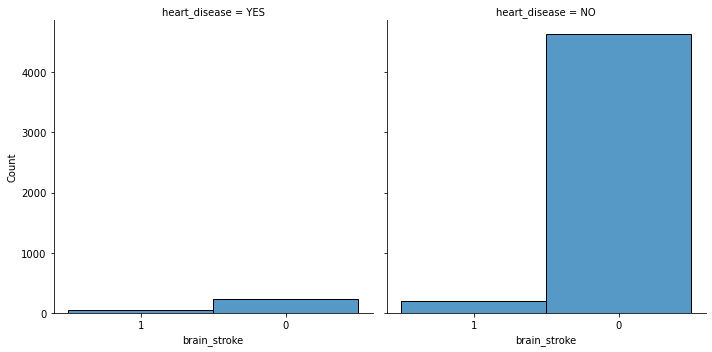

In [44]:
'''plt.figure()
plt.hist(df.loc[df_brainstroke['brain_stroke']=='Yes','heart_disease'],align='mid')
plt.xlabel('Heart Disease')
plt.ylabel('Count of Brain Strokes')
plt.title('1.	Comparing Brain Stroke in patients based on heart disease')
plt.show()'''
import seaborn as sns
sns.displot(df_brainstroke, x="brain_stroke", col="heart_disease")

As per analysis, With heart disease history have high chances of getting Brain stroke as the grph shows heart disease is directly proportional to Brain Stroke.

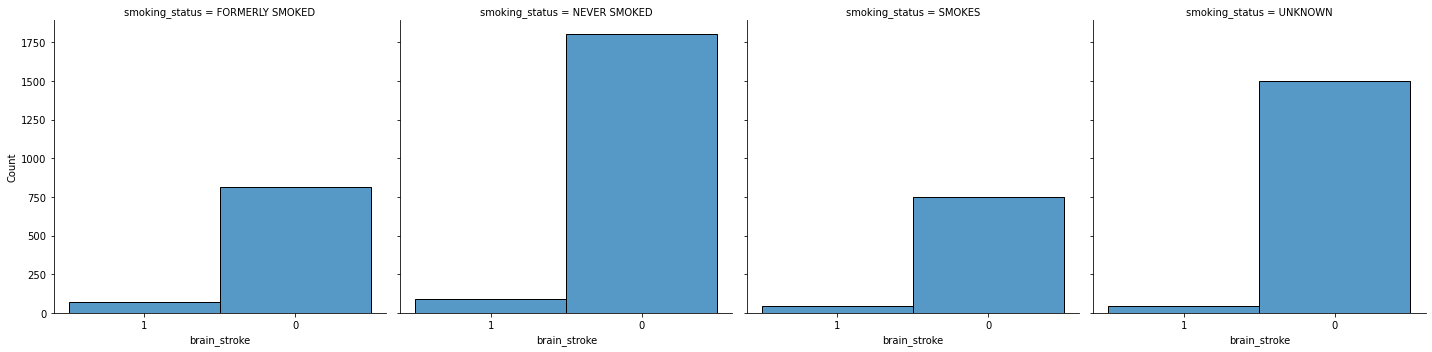

In [45]:
'''plt.figure()
plt.hist(df.loc[df_brainstroke['brain_stroke']=='Yes','smoking_status'],align='mid')
plt.xlabel('Smoking Status')
plt.ylabel('Count of Brain Strokes')
plt.title('Comparing Brain Stroke in patients based on smoking status')
plt.show()'''
import seaborn as sns
sns.displot(df_brainstroke, x="brain_stroke", col="smoking_status")

As per graphical representation, we can confirm that non-smokers have very little chances of getting Brain stroke

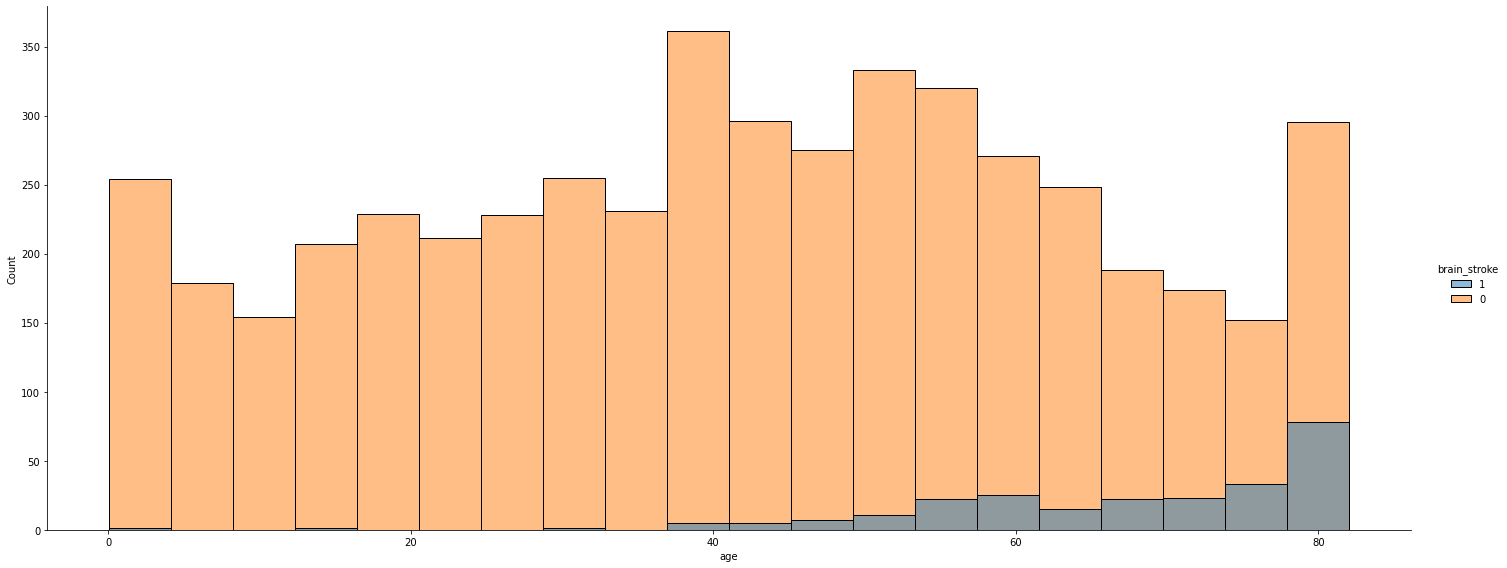

In [46]:
'''plt.rcParams["figure.figsize"] = (20,8)
plt.hist(df.loc[df_brainstroke['brain_stroke']!='No','age'])
plt.xlabel('Age')
plt.ylabel('Count of Brain Strokes')
plt.title('Comparing Brain Stroke in patients based on age')
plt.show()'''
sns.displot(df_brainstroke, x="age", hue="brain_stroke",height=8,aspect=20/8)

As per the grapical analysis, people over the age of 40 have high chances of getting Brain stroke

### MILESTONE 3

## Building a model and evaluating

In [47]:
#importing libraries
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import make_classification

In [48]:
cat_columns = df_brain_one_hot.select_dtypes(include='object').keys()
cat_columns

Index(['brain_stroke'], dtype='object')

In [49]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(df_brainstroke[cat_columns]).toarray())
enc_df

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
5105,1.0,0.0
5106,1.0,0.0
5107,1.0,0.0
5108,1.0,0.0


In [50]:
# merge with main df df_brainstroke on key values
df_brainstroke = df_brainstroke.join(enc_df)
df_brainstroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,brain_stroke,stage_of_life,weight_status,0,1
0,MALE,67.0,NO,YES,YES,PRIVATE,URBAN,228.69,36.6,FORMERLY SMOKED,1,SENIOR ADULT,OBESITY,0.0,1.0
1,FEMALE,61.0,NO,NO,YES,SELF EMPLOYED,RURAL,202.21,28.1,NEVER SMOKED,1,SENIOR ADULT,OBESITY,0.0,1.0
2,MALE,80.0,NO,YES,YES,PRIVATE,RURAL,105.92,32.5,NEVER SMOKED,1,SENIOR ADULT,OBESITY,0.0,1.0
3,FEMALE,49.0,NO,NO,YES,PRIVATE,URBAN,171.23,34.4,SMOKES,1,MIDDLE AGE ADULT,OBESITY,0.0,1.0
4,FEMALE,79.0,YES,NO,YES,SELF EMPLOYED,RURAL,174.12,24.0,NEVER SMOKED,1,SENIOR ADULT,HEALTHY WEIGHT,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,FEMALE,80.0,YES,NO,YES,PRIVATE,URBAN,83.75,28.1,NEVER SMOKED,0,SENIOR ADULT,OBESITY,1.0,0.0
5106,FEMALE,81.0,NO,NO,YES,SELF EMPLOYED,URBAN,125.20,40.0,NEVER SMOKED,0,SENIOR ADULT,OBESITY,1.0,0.0
5107,FEMALE,35.0,NO,NO,YES,SELF EMPLOYED,RURAL,82.99,30.6,NEVER SMOKED,0,ADULT,OBESITY,1.0,0.0
5108,MALE,51.0,NO,NO,YES,PRIVATE,RURAL,166.29,25.6,FORMERLY SMOKED,0,MIDDLE AGE ADULT,OVERWEIGHT,1.0,0.0


In [51]:
df_brainstroke['gender'] = df_brainstroke['gender'].map(dict(zip(['MALE','FEMALE','OTHER'],[0,1,2])))
df_brainstroke['hypertension'] = df_brainstroke['hypertension'].map(dict(zip(['YES','NO'],[1,0])))
df_brainstroke['heart_disease'] = df_brainstroke['heart_disease'].map(dict(zip(['YES','NO'],[1,0])))
df_brainstroke['ever_married'] = df_brainstroke['ever_married'].map(dict(zip(['YES','NO'],[1,0])))
df_brainstroke['work_type'] = df_brainstroke['work_type'].map(dict(zip(['PRIVATE', 'SELF EMPLOYED', 'GOVERNMENT', 'STUDENT',
       'NEVER_WORKED'],[0,1,2,3,4])))
df_brainstroke['Residence_type'] = df_brainstroke['Residence_type'].map(dict(zip(['URBAN','RURAL'],[1,0])))
df_brainstroke['smoking_status'] = df_brainstroke['smoking_status'].map(dict(zip(['FORMERLY SMOKED', 'NEVER SMOKED', 'SMOKES', 'UNKNOWN'],[0,1,2,3])))
df_brainstroke['stage_of_life'] = df_brainstroke['stage_of_life'].map(dict(zip(['SENIOR ADULT', 'MIDDLE AGE ADULT ', 'ADULT', 'INFANT', 'TEEN',
       'TODDLER', 'CHILD'],[0,1,2,3,4,5,6])))
df_brainstroke['weight_status'] = df_brainstroke['weight_status'].map(dict(zip(['OBESITY', 'HEALTHY WEIGHT', 'OVERWEIGHT', 'UNDERWEIGHT'],[0,1,2,3])))

In [52]:
#df_brain = df_brain.dropna()
y = df_brain_one_hot["brain_stroke"]
X = df_brain_one_hot.drop('brain_stroke', axis=1)

In [53]:
# Split dataset into random train and test subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [54]:
#pip install imbalanced-learn

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [56]:
# summarize the new class distribution
from collections import Counter
counter = Counter(y_train)
print(counter)
counter = Counter(y_test)
print(counter)
counter = Counter(y_res)
print(counter)

Counter({'0': 3895, '1': 193})
Counter({'0': 966, '1': 56})
Counter({'0': 3895, '1': 3895})


In [57]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [58]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 
X_res = scaler.fit_transform(X_res)

### 2. KNN classifier:

In [59]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier()
classifier.fit(X_res, y_res)

KNeighborsClassifier()

In [60]:
# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

In [61]:
# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

[[937  29]
 [ 49   7]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       966
           1       0.19      0.12      0.15        56

    accuracy                           0.92      1022
   macro avg       0.57      0.55      0.56      1022
weighted avg       0.91      0.92      0.92      1022



In [62]:
knn_score = accuracy_score(y_test, y_predict, normalize=False)
knn_score

944

In [63]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(4088, 34)
(1022, 34)


In [64]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(4088,)
(1022,)


In [65]:
#Importing libraries
from sklearn.linear_model import LogisticRegression

In [66]:
#train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [67]:
import sklearn.metrics as metrics
#make predictions on the testing set
y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9452054794520548


In [68]:
#Repeat for KNN with K=5:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9442270058708415


In [69]:
#Repeat for KNN with K=1:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9442270058708415


In [70]:
# try K=1 through K=35 and record testing accuracy
k_range = range(1, 36)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 36
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print("Accuracy Score of KNN Classifier:  " + str(scores))

Accuracy Score of KNN Classifier:  [0.9187866927592955, 0.9422700587084148, 0.9344422700587084, 0.9461839530332681, 0.9442270058708415, 0.9452054794520548, 0.9442270058708415, 0.9452054794520548, 0.9452054794520548, 0.9442270058708415, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548]


Text(0, 0.5, 'Testing Accuracy')

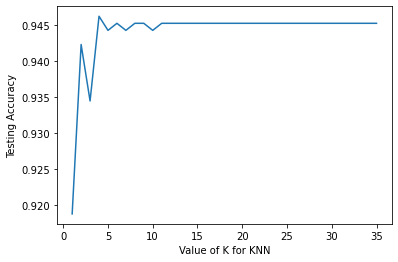

In [71]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

##### Summary:
As per the classification regression and KNeighborsRegressoion after evaluating the accuracy of the training model we got the output around 0.95

## Decision Tree Classifier:

In [72]:
#Import libraries
from sklearn.tree import DecisionTreeClassifier

In [73]:
#save the feature name and target variables
feature_names = X.columns
labels = y.unique()
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X,y,
                                                 test_size = 0.4,
                                                 random_state = 42)

In [74]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

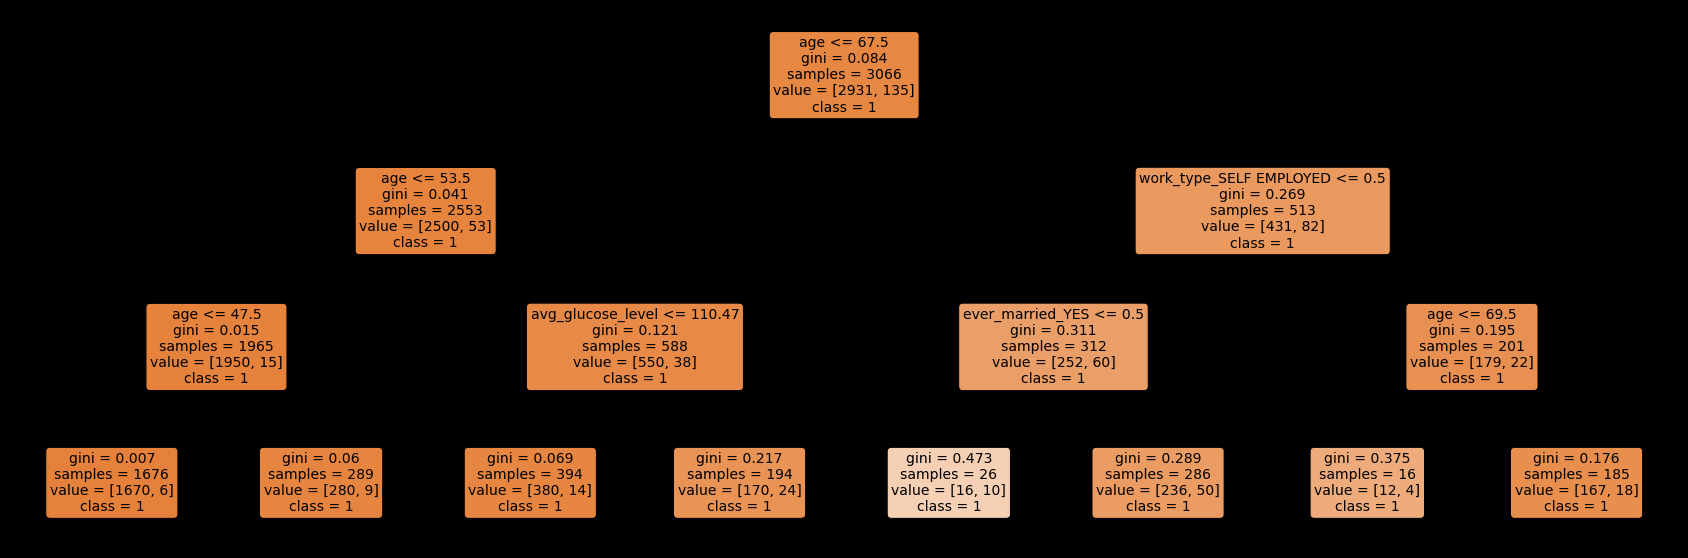

In [75]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt
#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [76]:
test_pred_decision_tree = clf.predict(test_x)

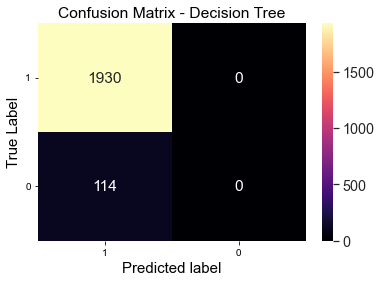

<Figure size 720x504 with 0 Axes>

In [77]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [78]:
print("Accuracy Score of Decision Tree Classifier:  " + str(accuracy_score(test_lab, test_pred_decision_tree)))

Accuracy Score of Decision Tree Classifier:  0.9442270058708415


## Random Forest Classifier

In [79]:
#Split the data
training, testing, training_labels, testing_labels = train_test_split(X, y, test_size = .25, random_state = 42)

In [80]:
# Normalize the data
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(training), columns = X.columns)
normed_test_data = pd.DataFrame(sc.fit_transform(testing), columns = X.columns)

In [81]:
#Building Random Forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf=RandomForestClassifier()
clf.fit(training, training_labels)

RandomForestClassifier()

In [82]:
preds = clf.predict(testing)

In [83]:
print(clf.score(testing, testing_labels))

0.9374021909233177


In [84]:
print("Accuracy Score of Random Forest Classifier:  " + str(accuracy_score(testing_labels, preds)))

Accuracy Score of Random Forest Classifier:  0.9374021909233177


In [85]:
confusion_matrix(testing_labels, preds)

array([[1197,    1],
       [  79,    1]], dtype=int64)

## Summary:

With classification regression and KNeighborsRegression, after evaluating the accuracy of the training model we got the output around 0.944.

With Decision Tree Classifier, after evaluating the accuracy of the training model we got the output around 0.944.

With Random Forest Classifier, after evaluating the accuracy of the training model we got the output around 0.937.

Though, there is not much difference, with 95% accuracy, classification regression and KNeighborsRegression is the best model.